## About Dataset

### Context

Welcome to the shopping world of Istanbul! Our dataset contains shopping information from 10 different shopping malls between 2021 and 2023. We have gathered data from various age groups and genders to provide a comprehensive view of shopping habits in Istanbul. The dataset includes essential information such as invoice numbers, customer IDs, age, gender, payment methods, product categories, quantity, price, order dates, and shopping mall locations. We hope that this dataset will serve as a valuable resource for researchers, data analysts, and machine learning enthusiasts who want to gain insights into shopping trends and patterns in Istanbul. Explore the dataset and discover the fascinating world of Istanbul shopping!

### Content

#### Attribute Information:

invoice_no: Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation.

customer_id: Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation.

gender: String variable of the customer's gender.

age: Positive Integer variable of the customers age.

category: String variable of the category of the purchased product.

quantity: The quantities of each product (item) per transaction. Numeric.

price: Unit price. Numeric. Product price per unit in Turkish Liras (TL).

payment_method: String variable of the payment method (cash, credit card or debit card) used for the transaction.

invoice_date: Invoice date. The day when a transaction was generated.

shopping_mall: String variable of the name of the shopping mall where the transaction was made.

#### Link: https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
# Data reading
data = pd.read_csv('customer_shopping_data.csv')
df = data.copy()
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
# Number of rows
df.shape[0]

99457

In [4]:
# Check missing values
df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [5]:
# Check duplicated values
df.duplicated().sum()

0

In [6]:
# Types check
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [7]:
# Convert object to date format
df.invoice_date = pd.to_datetime(df.invoice_date, dayfirst=True)

In [8]:
# Numericals stats
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [9]:
# Add new column with total price
df['total_price'] = df['quantity'] * df['price']
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40


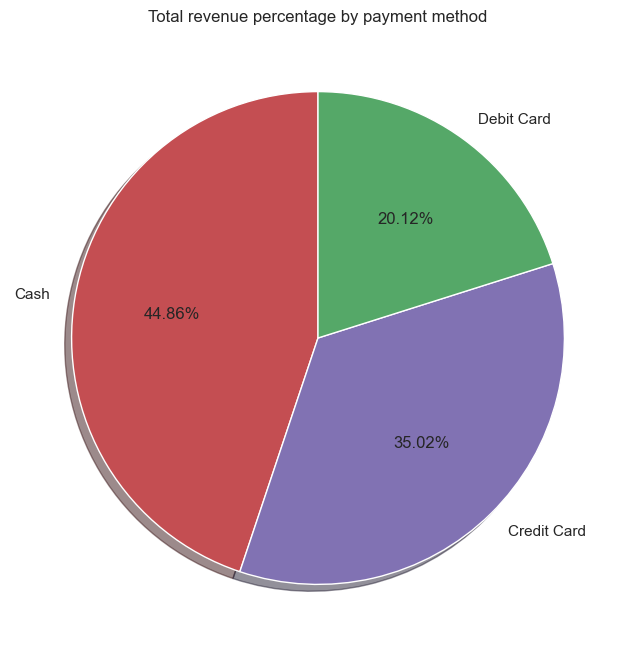

In [10]:
# Total revenue percentage by payment method
payment_methods_total = df.groupby('payment_method', as_index=False)\
                          .agg({'total_price':'sum'})\
                          .rename(columns = {'total_price':'total_sum'})

labels = payment_methods_total.payment_method.to_list()
plt.figure(figsize = (8,8))
plt.pie(payment_methods_total.total_sum,
        labels = labels,
        autopct = '%1.2f%%',
        startangle=90,
        shadow=True, 
        colors = ['r','m','g'])
plt.title('Total revenue percentage by payment method')
plt.show()

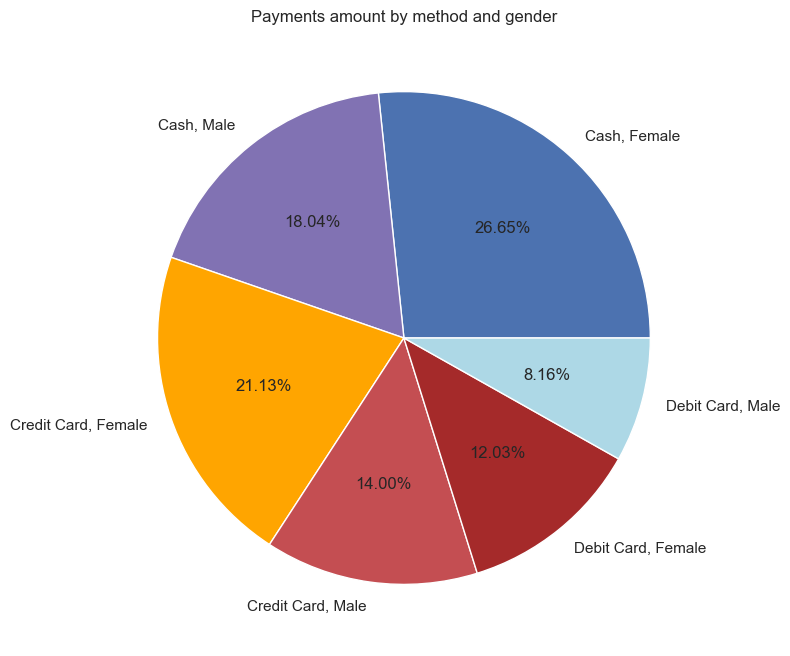

In [11]:
# Payments amount by method and gender
payment_methods_by_gender = df.groupby(['payment_method','gender'], as_index=False)\
                              .agg({'customer_id':'count'})
plt.figure(figsize = (8,8))
plt.pie(payment_methods_by_gender.customer_id,
        autopct= '%1.2f%%',
        colors = ['b','m', 'orange', 'r', 'brown','lightblue', 'darkred'],
        labels = ['Cash, Female','Cash, Male', 'Credit Card, Female', 'Credit Card, Male', 'Debit Card, Female', 'Debit Card, Male'])
plt.title('Payments amount by method and gender')
plt.show()

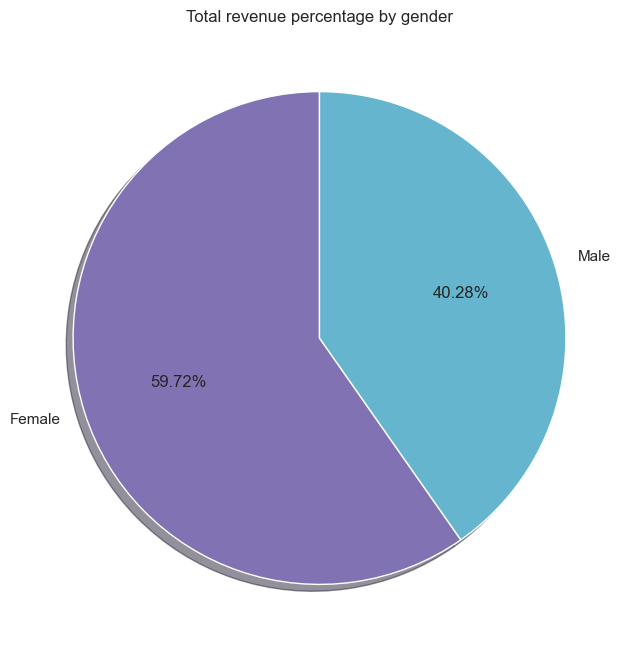

In [12]:
# Gender total revenue percentage
total_sum_by_gender = df.groupby('gender',as_index=False)\
                        .agg({'total_price':'sum'})\
                        .rename(columns = {'total_price':'total_sum'})

labels = total_sum_by_gender.gender.to_list()
plt.figure(figsize = (8,8))
plt.pie(total_sum_by_gender.total_sum,
        labels = labels,
        autopct = '%1.2f%%',
        startangle=90,
        shadow=True, 
        colors = ['m','c'])
plt.title('Total revenue percentage by gender')
plt.show()

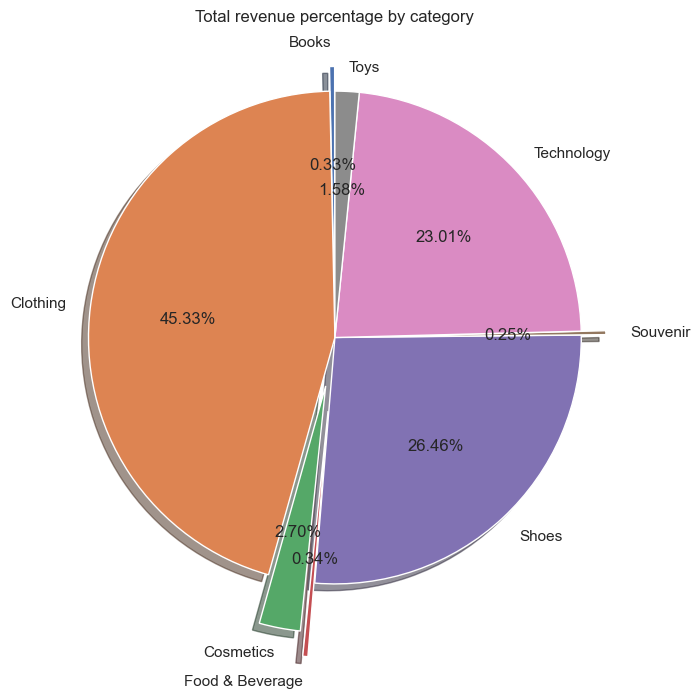

In [13]:
# Total revenue percentage by category
total_sum_by_category = df.groupby('category',as_index=False)\
                        .agg({'total_price':'sum'})\
                        .rename(columns = {'total_price':'total_sum'})

labels = total_sum_by_category.category.to_list()
plt.figure(figsize = (8,8))
plt.pie(total_sum_by_category.total_sum,
        labels = labels,
        autopct = '%1.2f%%',
        startangle=90,
        explode = [0.1,0, 0.2, 0.3, 0, 0.1, 0, 0],
        shadow=True)
plt.title('Total revenue percentage by category')
plt.show()

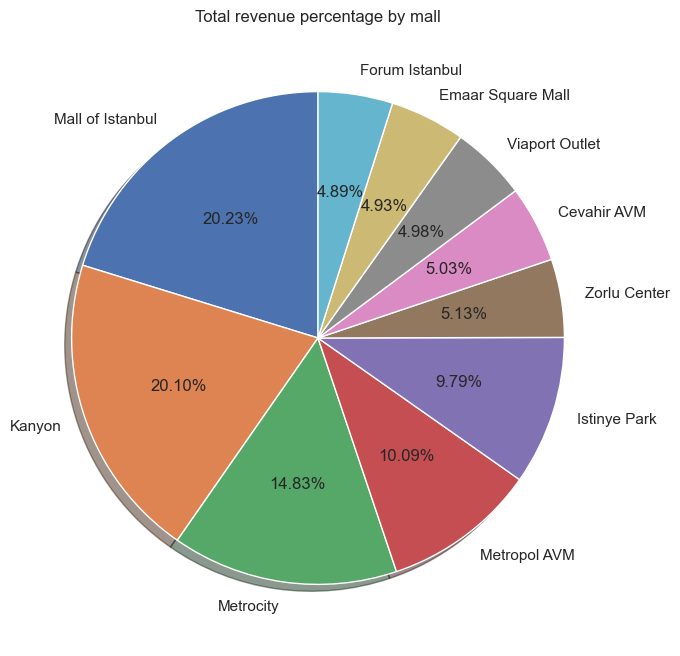

In [14]:
# Total revenue percentage by mall
total_sum_by_mall = df.groupby('shopping_mall', as_index=False)\
                      .agg({'total_price':'sum'})\
                      .sort_values('total_price', ascending=False)\
                      .rename(columns = {'total_price':'total_sum'})

labels = total_sum_by_mall.shopping_mall.to_list()
plt.figure(figsize = (10,8))
plt.pie(total_sum_by_mall.total_sum, autopct = '%1.2f%%', labels=labels,
        startangle=90, shadow=True)
plt.title('Total revenue percentage by mall')
plt.show()

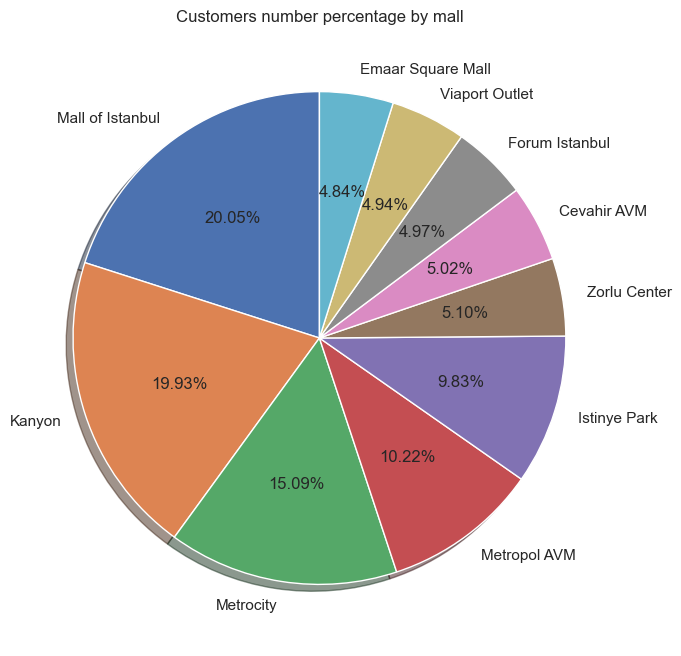

In [15]:
# Customers number percentage by mall
customers_count_by_mall = df.groupby('shopping_mall', as_index=False)\
                            .agg({'customer_id':'count'})\
                            .sort_values('customer_id', ascending=False)
labels = customers_count_by_mall.shopping_mall.to_list()
plt.figure(figsize = (10,8))
plt.pie(customers_count_by_mall.customer_id, autopct = '%1.2f%%', labels=labels,
        startangle=90, shadow=True)
plt.title('Customers number percentage by mall')
plt.show()

In [16]:
# Customer id is unique in every row, so grouping by customer isn`t necessary.
df.customer_id.nunique()

99457

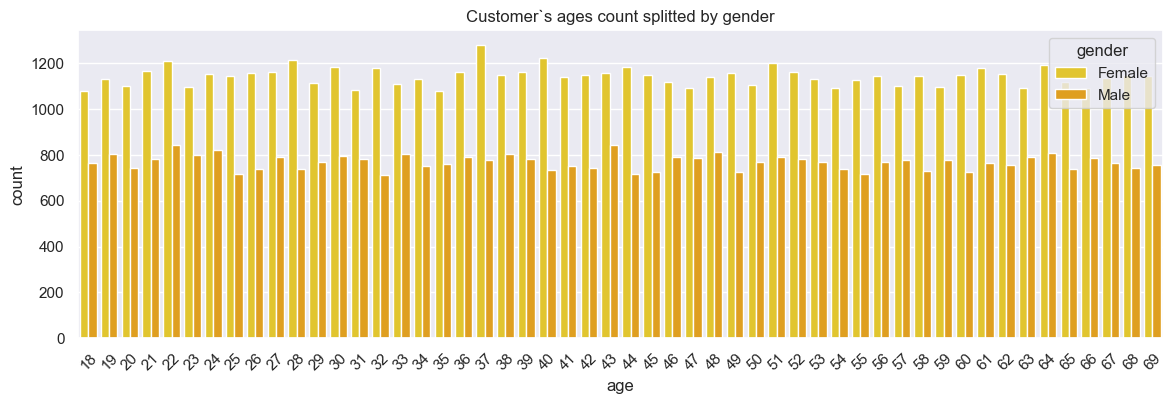

In [17]:
# Ages count splitted by gender
plt.figure(figsize = (14,4))
sns.countplot(x = df.age, palette = 'Wistia', hue= df.gender)
plt.title('Customer`s ages count splitted by gender')
plt.xticks(rotation = 45)
plt.show()

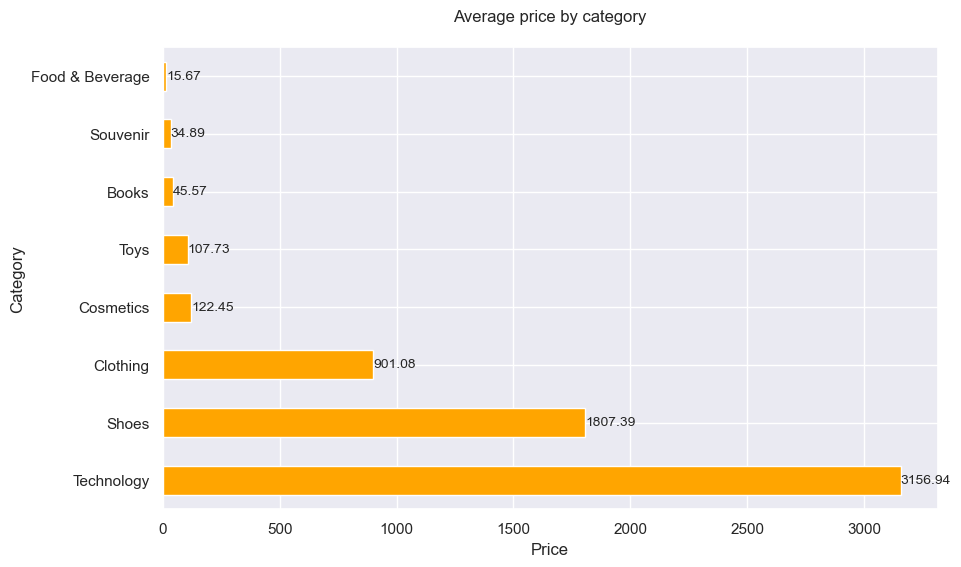

In [18]:
# Average price by category
category_mean = df.groupby('category')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
category_mean.plot(kind='barh', color='orange')
plt.xlabel('Price')
plt.ylabel('Category')
plt.title('Average price by category\n')

# add labels to the bars
for i, mean in enumerate(category_mean):
    plt.text(mean, i, round(mean, 2), va='center', fontsize=10)

plt.show()

In [19]:
# Extracting year and month from date and creating new columns
df['year'] = df.invoice_date.dt.year
df['year_month'] = df.invoice_date.astype('str').str.split('-').apply(lambda x: '-'.join(map(str,x[:-1])))

In [20]:
# Check new columns
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price,year,year_month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,2022,2022-08
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021,2021-12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,2021,2021-11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021,2021-05
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021,2021-10


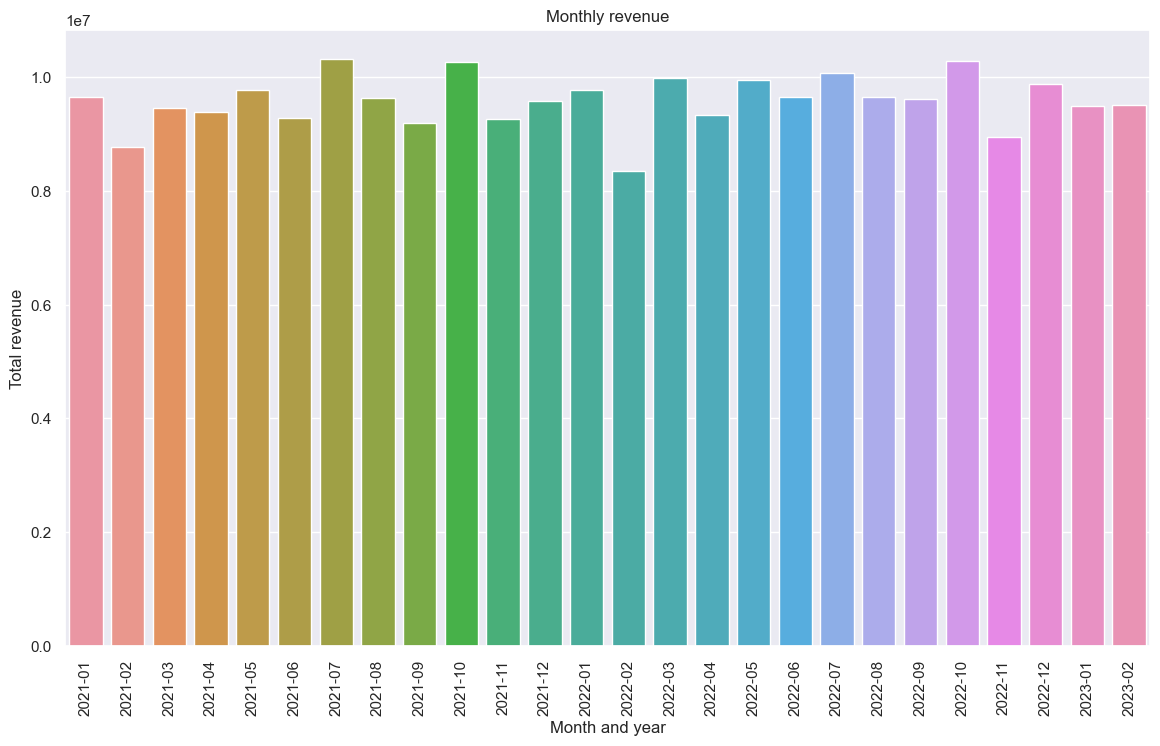

In [21]:
# Monthly revenue
monthly_revenue = df.groupby('year_month', as_index=False).agg({'total_price':'sum'})
monthly_revenue = monthly_revenue[monthly_revenue['year_month']!='2023-03']

plt.figure(figsize=(14,8))
sns.barplot(x = monthly_revenue.year_month, y = monthly_revenue.total_price)
plt.xticks(rotation = 90)
plt.xlabel('Month and year')
plt.ylabel('Total revenue')
plt.title('Monthly revenue')
plt.show()

In [22]:
average_monthly_revenue = monthly_revenue['total_price'].mean()
print(f'Overall average monthly revenue is {round(average_monthly_revenue,2)} TL')

Overall average monthly revenue is 9576601.83 TL


In [23]:
# Average revenue per customer
ARPU = df.total_price.sum()/df.customer_id.nunique()
print(f'Average revenue per customer: {ARPU.round(2)} TL')

Average revenue per customer: 2528.79 TL


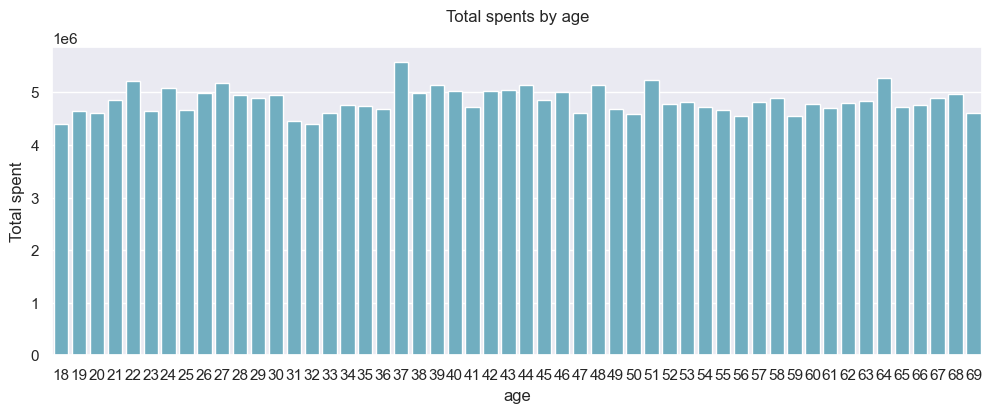

In [24]:
# Total spents by age
top_ages_spent = df.groupby('age', as_index=False)\
                     .agg({'total_price':'sum'})\
                     .sort_values('total_price', ascending=False)

plt.figure(figsize=(12,4))
sns.barplot(x = top_ages_spent.age, y = top_ages_spent.total_price, color = 'c')
plt.title('Total spents by age\n')
plt.ylabel('Total spent')
plt.show()

In [25]:
top_3_categories_by_revenue = df.groupby('category', as_index=False)\
                            .agg({'total_price':'sum'})\
                            .sort_values('total_price', ascending = False)\
                            .head(3)
top_3_categories_by_revenue

,category,total_price
1,Clothing,1.139968e+08
4,Shoes,6.655345e+07
6,Technology,5.786235e+07


In [26]:
average_purchase_by_gender = df.groupby('gender', as_index=False).agg({'total_price':'mean'})
average_purchase_by_gender

,gender,total_price
0,Female,2525.253623
1,Male,2534.050237


#### Analytic report:

-Cash is most popular payment method.

-Debit card is least popular payment method.

-Average purchases by gender are almost equal.

-Women go shopping more frequent in every age and most of them prefer to pay cash.

-Technology category has maximum average purchase.

-Most profitable category is clothing.

-Overall average monthly revenue is 9,576,601.83 TL.

-Average revenue per customer: 2528.79 TL.

-Most successful malls by revenue and number of customers: Mall of Istanbul, Kanyon.

-Most valuable customer's age is 37.

## Customer's spents prediction using some regression models

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [28]:
# Drop non-informative columns
data = data.drop(columns = ['invoice_no','customer_id','invoice_date'])

In [29]:
# Categoricals columns
categoricals = data.select_dtypes(include = 'object').columns.to_list()
categoricals

['gender', 'category', 'payment_method', 'shopping_mall']

In [30]:
# Create new dataframe with numericals and new column with total price (predictable values)
df1 = data.drop(columns=categoricals)
df1['total_price'] = df1['quantity'] * df1['price']
df1 = df1.drop(columns=['price'])

In [31]:
# Encoding categoricals to numerical and adding it in new dataframe
encoder = LabelEncoder()
for cat in categoricals:
    df1[cat] = encoder.fit_transform(data[cat])

In [32]:
# Encoded categoricals, data preprocessing is ready
df1.head()

,age,quantity,total_price,gender,category,payment_method,shopping_mall
0,28,5,7502.00,0,1,1,4
1,21,3,5401.53,1,4,2,2
2,20,1,300.08,1,1,0,6
3,66,5,15004.25,0,4,1,7
4,53,4,242.40,0,0,0,4


<AxesSubplot:>

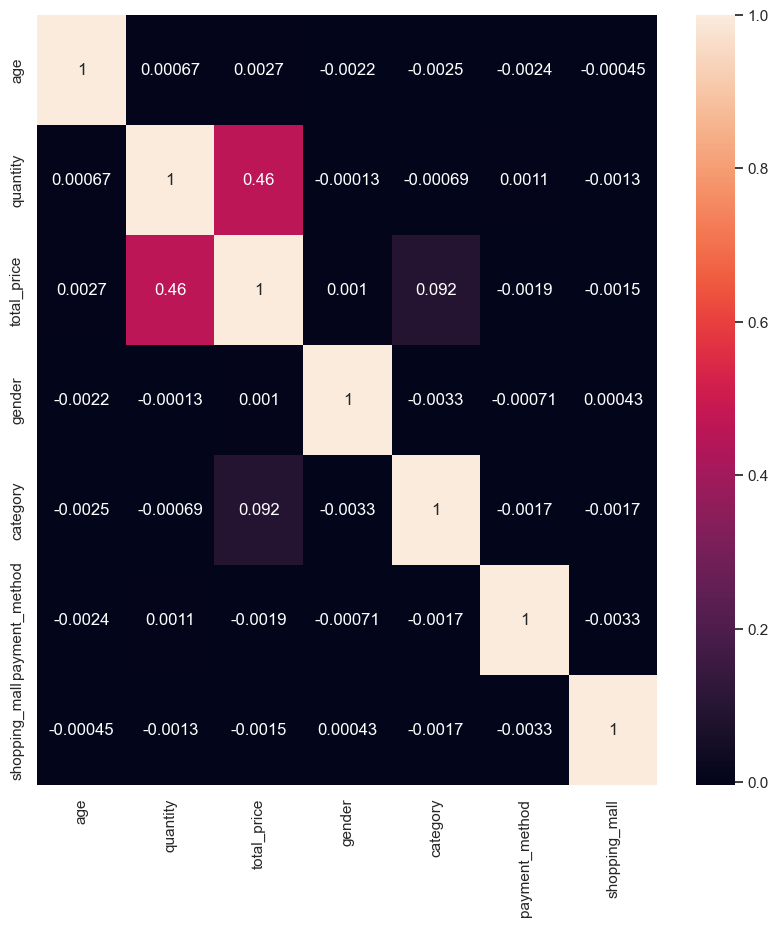

In [33]:
# Correlations
plt.figure(figsize = (10,10))
sns.heatmap(df1.corr(), annot=True)

In [34]:
# Splitting data to predictors and target (y is target)
X = df1.drop(columns = ['total_price'])
y = df1['total_price']

In [35]:
# Splitting to train and test samples
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
# Fitting regression models and getting scores
GB = GradientBoostingRegressor()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()

models = [GB, DT, RF]

for model in models:
    model.fit(x_train, y_train)
    print(f'{str(model)[:-2]} model score: {model.score(x_test, y_test)}')
    print('---------------------------------------------------')

GradientBoostingRegressor model score: 0.9892436177371232
---------------------------------------------------
DecisionTreeRegressor model score: 1.0
---------------------------------------------------
RandomForestRegressor model score: 1.0
---------------------------------------------------
